In [39]:
import numpy as np
import uproot
import awkward
import pandas as pd
import plotly.express as px
#using plotly as backend
pd.options.plotting.backend = "plotly"

inputFile = "/Users/pbutti/sw/mip_tracking/4gev_1e_tskim_v12_kaons_ldmx-det-v12_toughkskim.root"

with uproot.open(inputFile) as infile:
    ldmx_event_tree = infile["LDMX_Events"]
    ecal_rec_hits = ldmx_event_tree.arrays(["EcalRecHits_v3_v12.xpos_","EcalRecHits_v3_v12.ypos_","EcalRecHits_v3_v12.zpos_"],library="pd")
    print(ecal_rec_hits)
    
    #flatten the hits
    ecal_rec_hits_flat = ecal_rec_hits.reset_index()



                EcalRecHits_v3_v12.xpos_  EcalRecHits_v3_v12.ypos_  \
entry subentry                                                       
0     0                    -1.668264e+01                 -9.631728   
      1                    -8.341321e+00                  4.815864   
      2                    -1.251198e+01                 -2.407932   
      3                    -4.170660e+00                -60.198299   
      4                    -2.085330e+01                -16.855524   
...                                  ...                       ...   
34    39                   -8.341321e+00                 19.263456   
      40                   -4.170660e+00                 26.487251   
      41                    2.664535e-15                 19.263456   
      42                   -8.341321e+00                  4.815864   
      43                   -1.668264e+01                 19.263456   

                EcalRecHits_v3_v12.zpos_  
entry subentry                            
0  

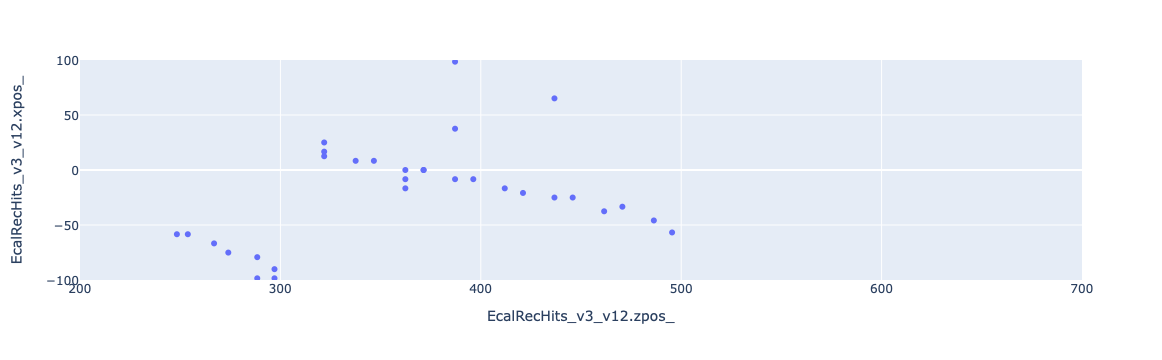

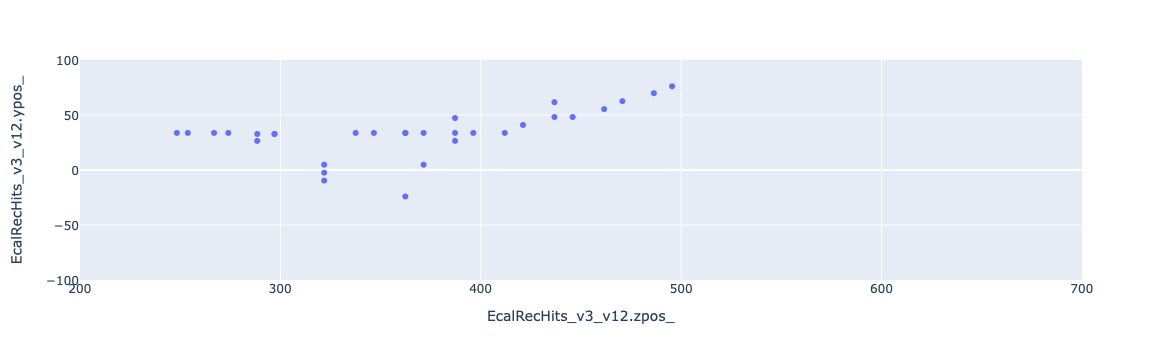

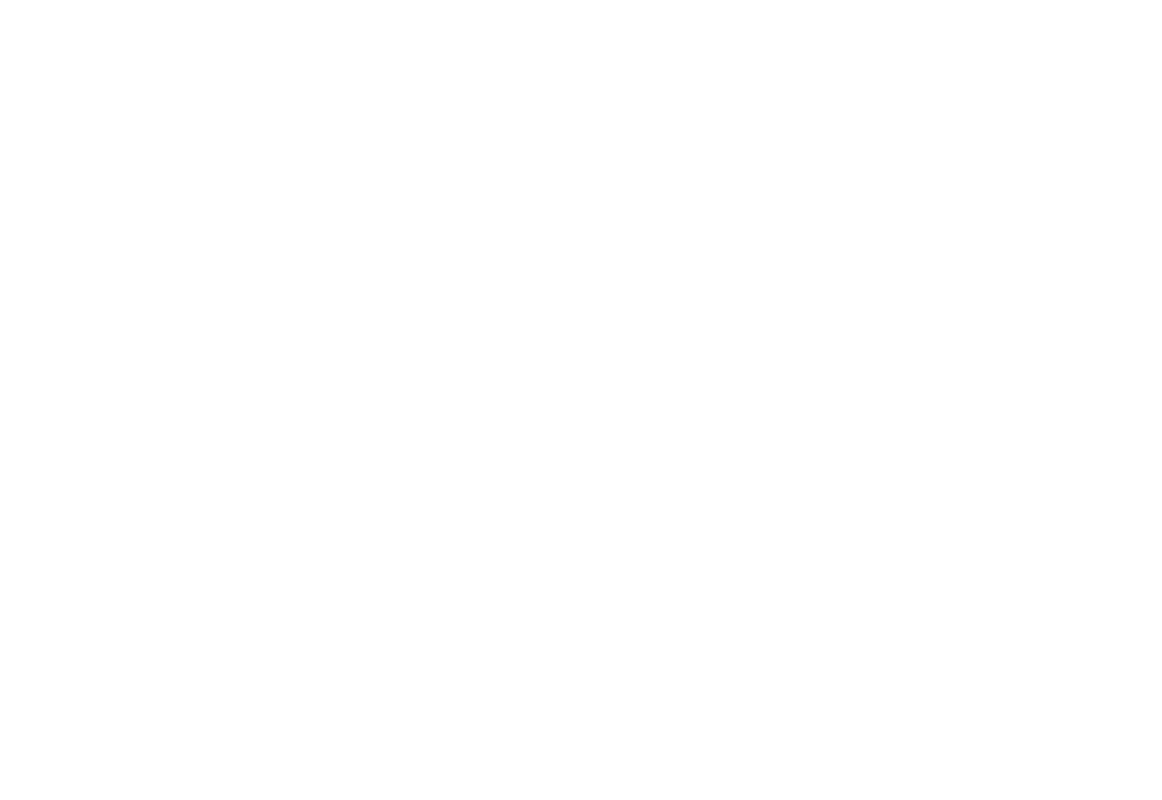

In [40]:
#Try to plot the projections
import plotly.graph_objects as go
from plotly.subplots import make_subplots

eventNr = 3
ecal_rec_hits_flat = ecal_rec_hits_flat[ecal_rec_hits_flat["entry"] == eventNr]


trace1 = go.Scatter(
    x=ecal_rec_hits_flat["EcalRecHits_v3_v12.zpos_"],
    y=ecal_rec_hits_flat["EcalRecHits_v3_v12.xpos_"],
    error_y = dict(
    # value of error bar given in data coordinates
        type ='data',
        array = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],
        visible = True),
    mode='markers',
    marker=dict(
        size=5,
        line=dict(width=0)),
    name='hits')


fig = ecal_rec_hits_flat.plot.scatter(x="EcalRecHits_v3_v12.zpos_",y="EcalRecHits_v3_v12.xpos_",)
#fig.update_traces(marker_size = 4)
#fig.add_trace(trace1)
fig.update_xaxes(range=[200, 700])
fig.update_yaxes(range=[-100, 100])
fig.show()

fig = ecal_rec_hits_flat.plot.scatter(x="EcalRecHits_v3_v12.zpos_",y="EcalRecHits_v3_v12.ypos_")
fig.update_xaxes(range=[200, 700])
fig.update_yaxes(range=[-100, 100])
#fig.update_traces(marker_size = 4)
#fig.add_trace(trace1)
fig.show()


fig = px.scatter_3d(ecal_rec_hits_flat, x='EcalRecHits_v3_v12.zpos_', y='EcalRecHits_v3_v12.ypos_', z='EcalRecHits_v3_v12.xpos_',width=800,height=800)
#fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
#fig.update_traces(marker_size = 4)
#fig.add_trace(trace3)
fig.update_xaxes(range=[200, 700])
fig.update_yaxes(range=[-100, 100])


fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=6, range=[200,700],),
                     yaxis = dict(nticks=10, range=[-100,100],),
                     zaxis = dict(nticks=10, range=[-100,100],),),
    autosize=False,
    margin=dict(r=20, l=10, b=10, t=10))



fig.show()



In [ ]:
def houghLine(hits_x, hits_y):
    #Get the size of the ECAL projection
    rangey = 200
    rangex = 500
    
    maxdist = int(np.round(np.sqrt(rangex**2 + rangey**2)))
    thetas = np.deg2rad(np.arange(-90,90))
    rs = np.linspace(-maxdist,maxdist,2*maxdist)
    
    accumulator = np.zeros((2*maxdist,len(thetas)))
    
                           
                           
                           
